In [10]:
#Imports
import pandas as pd
import numpy as np
import glob as glob
import datetime
import folium 
from folium.plugins import HeatMap, MarkerCluster
from folium import Choropleth, Circle, Marker

In [11]:
#Reading taxi files
path = r'data/df_sample_22_05_2021.parquet'
files = glob.glob(path)
files.sort()
df_trips = pd.concat([pd.read_parquet(fp) for fp in files])

In [12]:
df_trips.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
5402408,55e9f8e9d439cbe136ba82622ede4be417b4e760,c1365fc5d9c26f99b42911754818c3402e38e0094c19e4...,03/20/2017 05:45:00 PM,03/20/2017 06:00:00 PM,666.0,13.40,NaN,NaN,76.0,NaN,...,4.0,37.5,Cash,Flash Cab,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,None
18781727,f2a95893fef0e4f7141d0927f219d65839ec3f97,e203f043bc67df3a0c247621faa4524d93d89a49b02457...,09/25/2017 09:00:00 AM,09/25/2017 09:00:00 AM,714.0,1.11,1.703128e+10,1.703132e+10,28.0,32.0,...,0.0,8.0,Cash,Chicago Carriage Cab Corp,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
24964556,fa1da8624195cca1e67e7e24d49be3f5a6c66a38,e67eb932b76835a3010b0a51a8d0624d72714fee077c59...,12/31/2017 06:00:00 AM,12/31/2017 06:15:00 AM,300.0,1.50,NaN,NaN,24.0,7.0,...,0.0,11.0,Credit Card,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
19602125,9a3c7914c71fdb5fc3bf1794f171b712aa81b901,7b885f3c3b55b58bb3785c7b6876f9d5bf3d8a3e74486b...,10/07/2017 04:15:00 AM,10/07/2017 04:30:00 AM,480.0,0.00,NaN,NaN,28.0,7.0,...,0.0,12.0,Cash,Taxi Affiliation Services,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
215156,509af19342d154339c072d227c3bb648c3ad3ab2,0bd46f4637ddcdab1350b60cb03cbd9281279a7bb4a049...,01/05/2017 08:00:00 AM,01/05/2017 08:15:00 AM,900.0,5.60,1.703106e+10,1.703184e+10,6.0,32.0,...,0.0,17.0,Cash,City Service,41.943155,-87.640698,POINT (-87.640698076 41.9431550855),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [13]:
#check null values 
#should be null, because the null values are sampled in Notebook 1. 
cols_dropped = df_trips.dropna(inplace=False)
print("Original frame has",len(df_trips),"rows.")
print("Original frame has",len(df_trips)-len(cols_dropped),"rows with null values.")

Original frame has 4997601 rows.
Original frame has 2468479 rows with null values.


In [28]:
#Min and Max Trip Start and end
print("Min start: ",min(df_trips['Trip Start Timestamp']))
#print("Min end: ",min(df_trips['Trip End Timestamp']))
print("Max start: ",max(df_trips['Trip Start Timestamp']))
#print("Max end: ",max(df_trips['Trip End Timestamp']))

Min start:  01/01/2017 01:00:00 AM
Max start:  12/31/2017 12:45:00 PM


TypeError: '>' not supported between instances of 'NoneType' and 'str'

In [6]:
#Convert trip start and end to datetime
df_trips['Trip Start Timestamp']=pd.to_datetime(df_trips['Trip Start Timestamp'],format = '%m/%d/%Y %I:%M:%S %p')
df_trips['Trip End Timestamp']=pd.to_datetime(df_trips['Trip End Timestamp'],format = '%m/%d/%Y %I:%M:%S %p')

In [7]:
#Adding month and year columns for temp
def addCols(df):
    df_trips['DROPOFF MONTH NAME'] = df_trips['Trip End Timestamp'].dt.month_name()
    df_trips['DROPOFF YEAR'] = df_trips['Trip End Timestamp'].dt.year
    return df

df_trips = addCols(df_trips)

In [8]:
df_trips = df_trips.loc[df_trips['DROPOFF MONTH NAME']!='December']
df_trips = df_trips.loc[df_trips['DROPOFF YEAR']==2017]
print("Max start is now: ",max(df_trips['Trip Start Timestamp']))
print("Max end is now: ",max(df_trips['Trip End Timestamp']))

#Dropping month name again
df_trips.drop(columns='DROPOFF MONTH NAME', inplace = True)
df_trips.drop(columns='DROPOFF YEAR', inplace = True)

#We already see within the print, that there are too short trips - we have to check this

Max start is now:  2017-11-30 23:45:00
Max end is now:  2017-11-30 23:45:00


In [9]:
df_trips.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
15971142,65f93c35817734e3299be976d4f3b376bdd91416,561fbb8af15689fe33fb11b96905cfb95d11ac44700c1a...,2017-08-12 18:45:00,2017-08-12 19:15:00,1965.0,18.40,1.703198e+10,1.703108e+10,76.0,8.0,...,6.0,52.00,Cash,Chicago Carriage Cab Corp,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
167943,7a592eba4fe74de911db4b33878eab697730ddc2,1025e3aec9a251a432a6bca2bbe7a95bc032b369fd5be1...,2017-01-04 12:30:00,2017-01-04 12:45:00,610.0,1.55,1.703108e+10,1.703184e+10,8.0,8.0,...,0.0,8.00,Cash,Chicago Carriage Cab Corp,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.904935,-87.649907,POINT (-87.6499072264 41.9049353016)
14807345,25e63440cd1d3596401101ffde933ec7318acfe3,e81aeae39261dd72f248f92204fd28e77269f6bcf5d5c8...,2017-07-26 19:45:00,2017-07-26 19:45:00,298.0,0.99,1.703184e+10,1.703108e+10,32.0,8.0,...,1.0,11.50,Credit Card,City Service,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
3157769,a578a81d70af56cbbe627df7acc970cfd955333e,bb870d48c69eb329b88cb373037a1ee2d1c43f2d67a4b5...,2017-02-18 14:00:00,2017-02-18 14:15:00,805.0,1.46,1.703132e+10,1.703108e+10,32.0,8.0,...,1.0,9.75,Cash,Nova Taxi Affiliation Llc,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)
18992750,546c9371344e877441cd1466296bb60bb418b588,26b43fecf9e9479444973797e89a74f559183f1cc1abf0...,2017-09-28 09:00:00,2017-09-28 09:15:00,1332.0,1.59,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,12.00,Cash,Nova Taxi Affiliation Llc,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)


### clean trip seconds

In [10]:
#Get min and max durations
print("Min duration in seconds: ",min(df_trips['Trip Seconds']))
print("Max duration in seconds: ",max(df_trips['Trip Seconds']))

Min duration in seconds:  0.0
Max duration in seconds:  86374.0


In [12]:
#Set limits for durations based on quantiles
durLimit_duration  = [np.percentile(df_trips['Trip Seconds'], 8.0), np.percentile(df_trips['Trip Seconds'], 99.7)]

#Min trip: 2 min
durLimit_duration

[180.0, 4800.0]

In [320]:
#Limit trip_duration based on durLimit_miles
df_trips = df_trips[(df_trips['Trip Seconds'] >= durLimit_duration[0] ) & (df_trips['Trip Seconds'] <= durLimit_duration[1]) ]

### clean miles HAS TO BE VERIFIED !!!!!!!!

In [322]:
print("Min trip miles: ",min(df_trips['Trip Miles']))
print("Max trip miles: ",max(df_trips['Trip Miles']))

Min trip miles:  0.0
Max trip miles:  1234.0


In [323]:
#Set limits for miles based on quantiles
durLimit_miles  = [np.percentile(df_trips['Trip Miles'], 13.0), np.percentile(df_trips['Trip Miles'], 99.7)]

#Min miules: 0.3 ~ 500 meter 
durLimit_miles

[0.3, 20.9]

In [324]:
#Limit trip_duration based on durLimit_miles
df_trips = df_trips[(df_trips['Trip Miles'] >= durLimit_miles[0] ) & (df_trips['Trip Miles'] <= durLimit_miles[1]) ]

In [325]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917471 entries, 15971142 to 22504342
Data columns (total 23 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Trip ID                     object        
 1   Taxi ID                     object        
 2   Trip Start Timestamp        datetime64[ns]
 3   Trip End Timestamp          datetime64[ns]
 4   Trip Seconds                float64       
 5   Trip Miles                  float64       
 6   Pickup Census Tract         float64       
 7   Dropoff Census Tract        float64       
 8   Pickup Community Area       float64       
 9   Dropoff Community Area      float64       
 10  Fare                        float64       
 11  Tips                        float64       
 12  Tolls                       float64       
 13  Extras                      float64       
 14  Trip Total                  float64       
 15  Payment Type                object        
 16  Company   

### check trip totals

In [326]:
print("Min trip total: ",min(df_trips['Trip Total']))
print("Max trip total: ",max(df_trips['Trip Total']))

Min trip total:  0.0
Max trip total:  8062.52


In [327]:
#Set limits for trip totals based on quantiles
durLimit_tt  = [np.percentile(df_trips['Trip Total'], 0.004), np.percentile(df_trips['Trip Total'], 99.9)]

#Min miules: 0.3 ~ 500 meter 
durLimit_tt

[3.25, 68.9]

In [328]:
#Limit trip_duration based on durLimit_miles
df_trips = df_trips[(df_trips['Trip Total'] >= durLimit_miles[0] ) & (df_trips['Trip Total'] <= durLimit_miles[1]) ]

In [331]:
##HOW CAN THIS BE?

print("Max start is now: ",max(df_trips['Trip Start Timestamp']))
print("Max end is now: ",max(df_trips['Trip End Timestamp']))

##to be continued....

Max start is now:  2017-11-30 23:45:00
Max end is now:  2017-11-30 23:45:00


In [333]:
df_trips.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
167943,7a592eba4fe74de911db4b33878eab697730ddc2,1025e3aec9a251a432a6bca2bbe7a95bc032b369fd5be1...,2017-01-04 12:30:00,2017-01-04 12:45:00,610.0,1.55,1.703108e+10,1.703184e+10,8.0,8.0,...,0.0,8.00,Cash,Chicago Carriage Cab Corp,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.904935,-87.649907,POINT (-87.6499072264 41.9049353016)
14807345,25e63440cd1d3596401101ffde933ec7318acfe3,e81aeae39261dd72f248f92204fd28e77269f6bcf5d5c8...,2017-07-26 19:45:00,2017-07-26 19:45:00,298.0,0.99,1.703184e+10,1.703108e+10,32.0,8.0,...,1.0,11.50,Credit Card,City Service,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
3157769,a578a81d70af56cbbe627df7acc970cfd955333e,bb870d48c69eb329b88cb373037a1ee2d1c43f2d67a4b5...,2017-02-18 14:00:00,2017-02-18 14:15:00,805.0,1.46,1.703132e+10,1.703108e+10,32.0,8.0,...,1.0,9.75,Cash,Nova Taxi Affiliation Llc,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)
18992750,546c9371344e877441cd1466296bb60bb418b588,26b43fecf9e9479444973797e89a74f559183f1cc1abf0...,2017-09-28 09:00:00,2017-09-28 09:15:00,1332.0,1.59,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,12.00,Cash,Nova Taxi Affiliation Llc,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
15539240,ce7ad9fe1dfce893096e2268e76a5946dd499cd8,847cf962bd6f62040673e6c24c24940aeb2d7fdaa54677...,2017-08-06 03:00:00,2017-08-06 03:00:00,420.0,0.90,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,6.00,Cash,Taxi Affiliation Services,41.892073,-87.628874,POINT (-87.6288741572 41.8920726347),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)


In [337]:

#40.723663772 -73.989829374
# Create a map
m_2 = folium.Map(location=[41.8500300,-87.6500500], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
for idx, row in df_trips.iterrows():
    Marker([row['Pickup Centroid Latitude'], row['Pickup Centroid Longitude']]).add_to(m_2)

# Display the map
m_2


KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


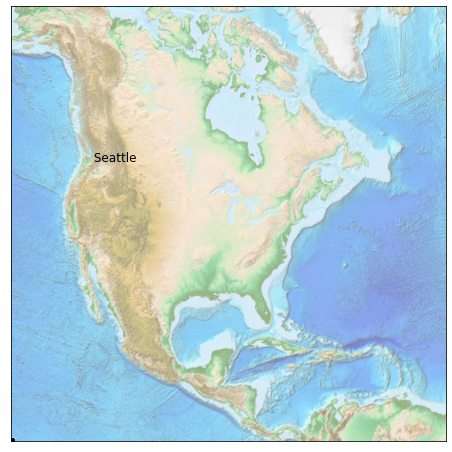

In [344]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=41.8500300, lon_0=-87.6500500,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(df_trips['Pickup Centroid Latitude'], df_trips['Pickup Centroid Longitude'], 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);



In [351]:
latitudes = df_trips.loc[:, 'Pickup Centroid Latitude']
longitudes = df_trips.loc[:, 'Pickup Centroid Longitude']

In [354]:
#conda install -c gmplot
import gmplot 

gmap = gmplot.GoogleMapPlotter(35, -102, 5)
gmap.scatter(latitudes[:1000], longitudes[:1000], 'red', size = 10)
gmap.draw('check_datapoints.html')

In [355]:
open("check_datapoints.html")

<_io.TextIOWrapper name='check_datapoints.html' mode='r' encoding='cp1252'>

In [358]:
#conda install bokeh bokeh
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap

In [359]:
output_file("bokeh.html")

map_options = GMapOptions(lat = 41.8500300, lng = -87.6500500, map_type = "roadmap", zoom = 4)
bokeh_plot = gmap("<API_KEY>", map_options, title = "Business locations")

source = ColumnDataSource(
    data = dict(lat = latitudes[:1000],
              lon = longitudes[:1000])
)
bokeh_plot.circle(x = "lon", y = "lat", size = 10, fill_alpha = 0.8, source = source)
show(bokeh_plot)

In [360]:
df_trips.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
167943,7a592eba4fe74de911db4b33878eab697730ddc2,1025e3aec9a251a432a6bca2bbe7a95bc032b369fd5be1...,2017-01-04 12:30:00,2017-01-04 12:45:00,610.0,1.55,1.703108e+10,1.703184e+10,8.0,8.0,...,0.0,8.00,Cash,Chicago Carriage Cab Corp,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.904935,-87.649907,POINT (-87.6499072264 41.9049353016)
14807345,25e63440cd1d3596401101ffde933ec7318acfe3,e81aeae39261dd72f248f92204fd28e77269f6bcf5d5c8...,2017-07-26 19:45:00,2017-07-26 19:45:00,298.0,0.99,1.703184e+10,1.703108e+10,32.0,8.0,...,1.0,11.50,Credit Card,City Service,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
3157769,a578a81d70af56cbbe627df7acc970cfd955333e,bb870d48c69eb329b88cb373037a1ee2d1c43f2d67a4b5...,2017-02-18 14:00:00,2017-02-18 14:15:00,805.0,1.46,1.703132e+10,1.703108e+10,32.0,8.0,...,1.0,9.75,Cash,Nova Taxi Affiliation Llc,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)
18992750,546c9371344e877441cd1466296bb60bb418b588,26b43fecf9e9479444973797e89a74f559183f1cc1abf0...,2017-09-28 09:00:00,2017-09-28 09:15:00,1332.0,1.59,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,12.00,Cash,Nova Taxi Affiliation Llc,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
15539240,ce7ad9fe1dfce893096e2268e76a5946dd499cd8,847cf962bd6f62040673e6c24c24940aeb2d7fdaa54677...,2017-08-06 03:00:00,2017-08-06 03:00:00,420.0,0.90,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,6.00,Cash,Taxi Affiliation Services,41.892073,-87.628874,POINT (-87.6288741572 41.8920726347),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)


In [377]:
maps = folium.Map([df_trips['Pickup Centroid Latitude'].mean(), df_trips['Pickup Centroid Longitude'].mean()], zoom_start=11, prefer_canvas=True)
for index, row in df_trips.iterrows():
    folium.CircleMarker([row['Pickup Centroid Latitude'], row['Pickup Centroid Longitude']],
                        radius=15,
                        fill_color="#3db7e4",
                       ).add_to(maps)
    
points = np.reshape(df_trips[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']], (-1, 2))


maps.add_child(HeatMap(points, radius=30)) # plot heatmap



MemoryError: 